# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

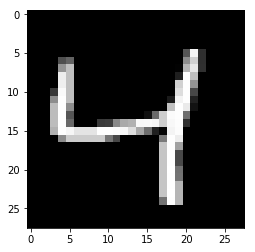

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=(None, image_size))
targets_ = tf.placeholder(tf.float32, shape=(None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6951
Epoch: 1/20... Training loss: 0.6916
Epoch: 1/20... Training loss: 0.6881
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6729
Epoch: 1/20... Training loss: 0.6671
Epoch: 1/20... Training loss: 0.6586
Epoch: 1/20... Training loss: 0.6473
Epoch: 1/20... Training loss: 0.6371
Epoch: 1/20... Training loss: 0.6259
Epoch: 1/20... Training loss: 0.6114
Epoch: 1/20... Training loss: 0.5964
Epoch: 1/20... Training loss: 0.5800
Epoch: 1/20... Training loss: 0.5623
Epoch: 1/20... Training loss: 0.5475
Epoch: 1/20... Training loss: 0.5248
Epoch: 1/20... Training loss: 0.5070
Epoch: 1/20... Training loss: 0.4915
Epoch: 1/20... Training loss: 0.4703
Epoch: 1/20... Training loss: 0.4544
Epoch: 1/20... Training loss: 0.4348
Epoch: 1/20... Training loss: 0.4223
Epoch: 1/20... Training loss: 0.4006
Epoch: 1/20... Training loss: 0.3909
Epoch: 1/20... Training loss: 0.3762
Epoch: 1/20... Training loss: 0.3744
E

Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1918
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1963
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1863
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1887
Epoch: 1/20... Training loss: 0.1976
E

Epoch: 2/20... Training loss: 0.1614
Epoch: 2/20... Training loss: 0.1649
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1545
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1647
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1597
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1565
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1604
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1591
E

Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1413
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1426
Epoch: 3/20... Training loss: 0.1415
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1300
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1385
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1409
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1407
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1360
E

Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1249
Epoch: 3/20... Training loss: 0.1257
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1259
Epoch: 3/20... Training loss: 0.1282
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1308
Epoch: 4/20... Training loss: 0.1295
Epoch: 4/20... Training loss: 0.1299
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1270
Epoch: 4/20... Training loss: 0.1256
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1234
E

Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1188
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1101
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1160
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1135
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1103
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1084
E

Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1126
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1101
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1095
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1131
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1080
Epoch: 6/20... Training loss: 0.1118
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1120
Epoch: 6/20... Training loss: 0.1092
E

Epoch: 6/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1069
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1072
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1066
Epoch: 7/20... Training loss: 0.0982
E

Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0999
E

Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1027
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0967
E

Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0923
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0917
E

Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.1016
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0916
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0964
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0998
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0890
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.1004
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0896
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0901
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0904
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0980
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0970
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0975
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0987
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0899
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0896
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0965
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0961
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0895
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

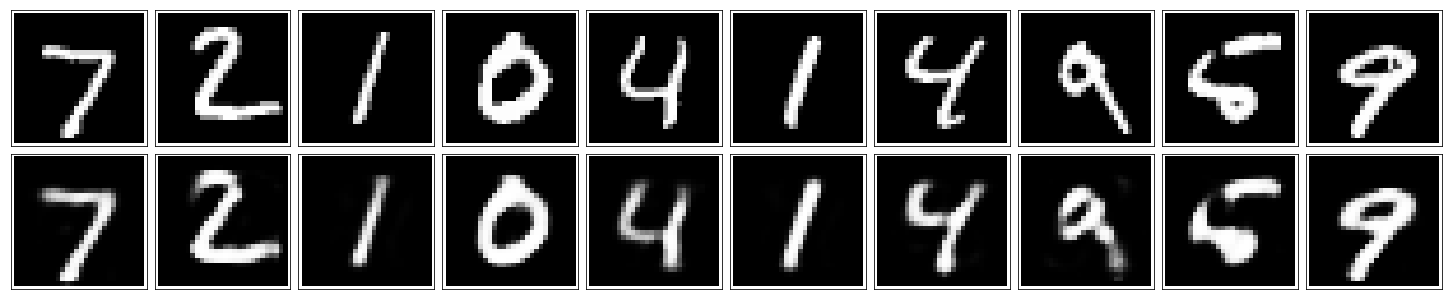

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.